PROYECTO INDIVIDUAL II - DATATHON 

In [1]:
#IMPORTAMOS LAS LIBRERIAS NECESARIAS 
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

     FASE 1: Carga y visualizacion de los datasets

In [2]:
#Guardamos el dataset de entrenamiento y test en un dataframe de pandas
df_train = pd.read_csv('Datasets\hospitalizaciones_train.csv')
df_test = pd.read_csv('Datasets\hospitalizaciones_test.csv')

In [3]:
#VISUALIZAMOS LOS PRIMEROS REGISTROS 
df_train.head(3)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7


In [4]:
df_test.head(3)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit
0,3,gynecology,F,Dr Olivia,10,2858,21-30,Female,Trauma,Moderate,Other,2,No,4749.640225
1,2,TB & Chest disease,E,Dr John,4,65657,51-60,Female,Trauma,Moderate,Asthama,2,Yes,4122.261324
2,2,radiotherapy,E,Dr John,7,45598,51-60,Other,Trauma,Moderate,None,3,No,5459.067882


    FASE 2: Preprocesamiento de datos

DATASET DE ENTRENAMIENTO

In [5]:
#VIZUALIZAMOS LA INFORMACION GENERAL DE LOS DATASETS
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  410000 non-null  int64  
 1   Department                         410000 non-null  object 
 2   Ward_Facility_Code                 410000 non-null  object 
 3   doctor_name                        410000 non-null  object 
 4   staff_available                    410000 non-null  int64  
 5   patientid                          410000 non-null  int64  
 6   Age                                410000 non-null  object 
 7   gender                             410000 non-null  object 
 8   Type of Admission                  410000 non-null  object 
 9   Severity of Illness                410000 non-null  object 
 10  health_conditions                  410000 non-null  object 
 11  Visitors with Patient              4100

In [6]:
#VISUALIZAMOS LAS MEDIDAS BASICAS DEL DATASET
df_train.describe()

,Available Extra Rooms in Hospital,staff_available,patientid,Visitors with Patient,Admission_Deposit,Stay (in days)
count,410000.000000,410000.000000,410000.000000,410000.000000,410000.000000,410000.000000
mean,3.639376,5.020946,63095.940020,3.552520,4723.419239,12.378193
std,2.701702,3.158018,41686.175937,2.247459,1047.420292,7.905618
min,0.000000,0.000000,-3146.000000,0.000000,1654.005148,3.000000
25%,2.000000,2.000000,25405.000000,2.000000,4072.638351,8.000000
50%,3.000000,5.000000,57736.000000,3.000000,4627.488745,9.000000
75%,4.000000,8.000000,103278.250000,4.000000,5092.349430,11.000000
max,24.000000,10.000000,134400.000000,32.000000,10104.726390,51.000000


In [7]:
#VERIFICAMOS SI HAY VALORES DUPLICADOS
df_train.duplicated().sum()

0

In [8]:
#VERIFICAMOS QUE VALOR TOMAN ALGUNAS COLUMNAS CUALITATIVAS Y HACEMOS LA DISCRETIZACION CON LABEL ENCODER
label_encoder = preprocessing.LabelEncoder()
print(df_train.Insurance.value_counts())
df_train.Insurance = label_encoder.fit_transform(df_train.Insurance)
df_train.Insurance.value_counts()

Yes    340499
No      69501
Name: Insurance, dtype: int64


1    340499
0     69501
Name: Insurance, dtype: int64

In [9]:
print(df_train["Type of Admission"].value_counts())
df_train["Type of Admission"] = label_encoder.fit_transform(df_train["Type of Admission"])
df_train["Type of Admission"].value_counts()

Trauma       254698
Emergency    111374
Urgent        43928
Name: Type of Admission, dtype: int64


1    254698
0    111374
2     43928
Name: Type of Admission, dtype: int64

In [10]:
print(df_train.Department.value_counts())
df_train.Department = label_encoder.fit_transform(df_train.Department)
df_train.Department.value_counts()

gynecology            281625
radiotherapy           69132
anesthesia             36250
TB & Chest disease     18825
surgery                 4168
Name: Department, dtype: int64


2    281625
3     69132
1     36250
0     18825
4      4168
Name: Department, dtype: int64

In [11]:
print(df_train.Age.value_counts())
df_train.Age = label_encoder.fit_transform(df_train.Age)
df_train.Age.value_counts()

21-30     135029
31-40     106772
41-50      65973
11-20      36760
61-70      21781
51-60      17733
71-80      15384
81-90       6678
0-10        2753
91-100      1137
Name: Age, dtype: int64


2    135029
3    106772
4     65973
1     36760
6     21781
5     17733
7     15384
8      6678
0      2753
9      1137
Name: Age, dtype: int64

In [12]:
print(df_train.gender.value_counts())
df_train.gender = label_encoder.fit_transform(df_train.gender)
df_train.gender.value_counts()

Female    299502
Male       92605
Other      17893
Name: gender, dtype: int64


0    299502
1     92605
2     17893
Name: gender, dtype: int64

In [13]:
print(df_train["Severity of Illness"].value_counts())
df_train["Severity of Illness"] = label_encoder.fit_transform(df_train["Severity of Illness"])
df_train["Severity of Illness"].value_counts()

Moderate    230819
Minor       107897
Extreme      71284
Name: Severity of Illness, dtype: int64


2    230819
1    107897
0     71284
Name: Severity of Illness, dtype: int64

In [14]:
print(df_train.health_conditions.value_counts())
df_train.health_conditions = label_encoder.fit_transform(df_train.health_conditions)
df_train.health_conditions.value_counts()

None                   137202
Other                   78335
High Blood Pressure     64089
Diabetes                58689
Asthama                 50428
Heart disease           21257
Name: health_conditions, dtype: int64


4    137202
5     78335
3     64089
1     58689
0     50428
2     21257
Name: health_conditions, dtype: int64

In [15]:
#CREAMOS UNA VARIABLE TARGET DONDE DISCRETIZAMOS EL STAY DONDE 0 ES UN PACIENTE QUE SE HOSPITALIZO MENOS DE 8 DIAS Y 1 UN PACIENTE QUE SE HOSPITALIZO MAS DE 8 DIAS
df_train['target'] = (df_train["Stay (in days)"] > 8).astype(int)
df_train.target.value_counts()

1    255416
0    154584
Name: target, dtype: int64

In [16]:
#ELIMINAMOS LA COLUMNA STAY YA QUE LA TENEMOS DISCRETIZADA EN OTRA COLUMNA
df_train.drop(["Stay (in days)", ], axis=1, inplace=True)

In [17]:
#ELIMINAMOS LAS COLUMNAS QUE NO SON RELEVANTES PARA EL MODELO
df_train.drop(["Ward_Facility_Code", ], axis=1, inplace=True)
df_train.drop(["Visitors with Patient", ], axis=1, inplace=True)
df_train.drop(["patientid", ], axis=1, inplace=True)
df_train.drop(["doctor_name", ], axis=1, inplace=True)

DATASET DE TEST

In [18]:
#VIZUALIZAMOS LA INFORMACION GENERAL DEL DATASET
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Available Extra Rooms in Hospital  90000 non-null  int64  
 1   Department                         90000 non-null  object 
 2   Ward_Facility_Code                 90000 non-null  object 
 3   doctor_name                        90000 non-null  object 
 4   staff_available                    90000 non-null  int64  
 5   patientid                          90000 non-null  int64  
 6   Age                                90000 non-null  object 
 7   gender                             90000 non-null  object 
 8   Type of Admission                  90000 non-null  object 
 9   Severity of Illness                90000 non-null  object 
 10  health_conditions                  90000 non-null  object 
 11  Visitors with Patient              90000 non-null  int

In [19]:
#VISUALIZAMOS LAS MEDIDAS BASICAS DEL DATASET
df_test.describe()

,Available Extra Rooms in Hospital,staff_available,patientid,Visitors with Patient,Admission_Deposit
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,3.636178,5.018300,63399.156900,3.535267,4717.288655
std,2.681778,3.158507,41703.856053,2.211598,1046.877545
min,0.000000,0.000000,-3269.000000,0.000000,1710.212495
25%,2.000000,2.000000,25633.000000,2.000000,4067.375540
50%,3.000000,5.000000,58469.000000,3.000000,4624.372449
75%,4.000000,8.000000,103812.500000,4.000000,5088.489369
max,24.000000,10.000000,134037.000000,32.000000,9872.650668


In [20]:
#VERIFICAMOS SI HAY VALORES DUPLICADOS
df_test.duplicated().sum()

0

In [21]:
#VERIFICAMOS QUE VALOR TOMAN ALGUNAS COLUMNAS CUALITATIVAS Y HACEMOS LA DISCRETIZACION CON LABEL ENCODER
print(df_test.Insurance.value_counts())
df_test.Insurance = label_encoder.fit_transform(df_test.Insurance)
df_test.Insurance.value_counts()

Yes    52461
No     37539
Name: Insurance, dtype: int64


1    52461
0    37539
Name: Insurance, dtype: int64

In [22]:
print(df_test["Type of Admission"].value_counts())
df_test["Type of Admission"] = label_encoder.fit_transform(df_test["Type of Admission"])
df_test["Type of Admission"].value_counts()

Trauma       55838
Emergency    24410
Urgent        9752
Name: Type of Admission, dtype: int64


1    55838
0    24410
2     9752
Name: Type of Admission, dtype: int64

In [23]:
print(df_test.Department.value_counts())
df_test.Department = label_encoder.fit_transform(df_test.Department)
df_test.Department.value_counts()

gynecology            61853
radiotherapy          15183
anesthesia             7929
TB & Chest disease     4065
surgery                 970
Name: Department, dtype: int64


2    61853
3    15183
1     7929
0     4065
4      970
Name: Department, dtype: int64

In [24]:
print(df_test.Age.value_counts())
df_test.Age = label_encoder.fit_transform(df_test.Age)
df_test.Age.value_counts()

31-40     26601
21-30     24764
41-50     14433
11-20      9776
61-70      4775
51-60      3985
71-80      3319
81-90      1503
0-10        615
91-100      229
Name: Age, dtype: int64


3    26601
2    24764
4    14433
1     9776
6     4775
5     3985
7     3319
8     1503
0      615
9      229
Name: Age, dtype: int64

In [25]:
print(df_test.gender.value_counts())
df_test.gender = label_encoder.fit_transform(df_test.gender)
df_test.gender.value_counts()

Female    71308
Male      10875
Other      7817
Name: gender, dtype: int64


0    71308
1    10875
2     7817
Name: gender, dtype: int64

In [26]:
print(df_test["Severity of Illness"].value_counts())
df_test["Severity of Illness"] = label_encoder.fit_transform(df_test["Severity of Illness"])
df_test["Severity of Illness"].value_counts()

Moderate    49378
Minor       23640
Extreme     16982
Name: Severity of Illness, dtype: int64


2    49378
1    23640
0    16982
Name: Severity of Illness, dtype: int64

In [27]:
print(df_test.health_conditions.value_counts())
df_test.health_conditions = label_encoder.fit_transform(df_test.health_conditions)
df_test.health_conditions.value_counts()

Other                  16076
High Blood Pressure    15313
Asthama                15086
Diabetes               14955
None                   14686
Heart disease          13884
Name: health_conditions, dtype: int64


5    16076
3    15313
0    15086
1    14955
4    14686
2    13884
Name: health_conditions, dtype: int64

In [28]:
#ELIMINAMOS LAS COLUMNAS QUE NO SON RELEVANTES PARA EL MODELO
df_test.drop(["patientid", ], axis=1, inplace=True)
df_test.drop(["Ward_Facility_Code", ], axis=1, inplace=True)
df_test.drop(["Visitors with Patient", ], axis=1, inplace=True)
df_test.drop(["doctor_name", ], axis=1, inplace=True)

    FASE 3 Creamos y graficamos la correlacion

DATASET DE ENTRENAMIENTO

In [29]:
#CREAMOS LA CORRELACION 
corr = df_train.corr(method='pearson')

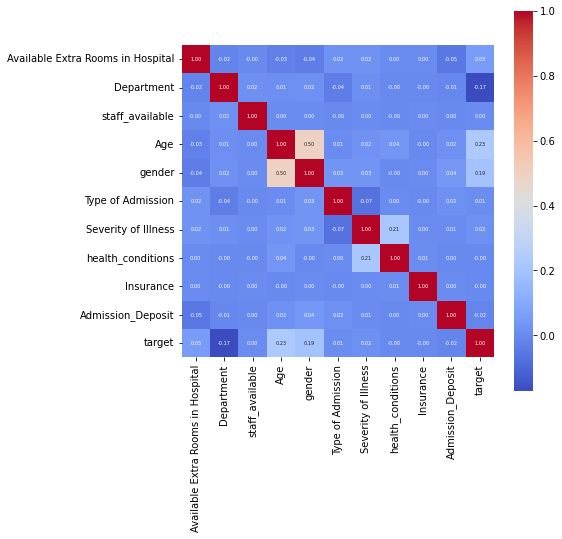

In [30]:
#GRAFICAMOS LA CORRELACION
plt.figure(figsize=(7,7))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 5},
           xticklabels= df_train.corr().columns, 
           yticklabels= df_train.corr().columns,
           cmap= 'coolwarm')

plt.show()

DATASET DE TEST

In [31]:
corrT = df_test.corr(method='pearson')

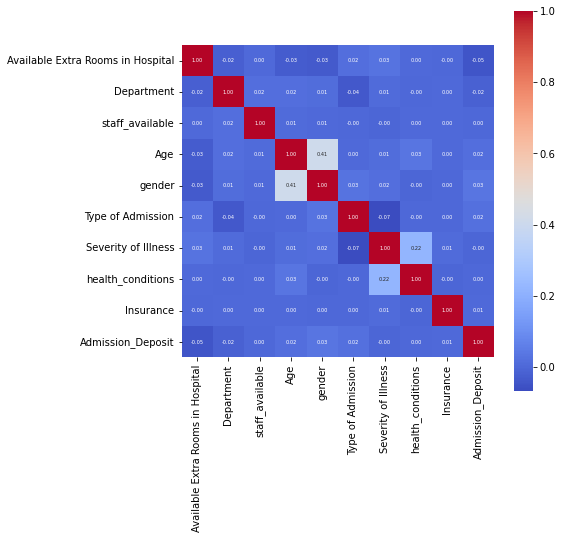

In [32]:
plt.figure(figsize=(7,7))
sns.heatmap(corrT, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 5},
           xticklabels= df_test.corr().columns, 
           yticklabels= df_test.corr().columns,
           cmap= 'coolwarm')

plt.show()

    FASE 4 Creación del modelo

In [34]:
#CREAMOS MODELO, EN ESTE CASO USAREMNOS ARBOL DE DESICIÓN
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 15, random_state = 30, criterion='entropy') 

    FASE 5 Entrenamiento del modelo

In [35]:
#DEFINIMOS X, y
X = df_train.drop(['target'], axis=1)
y = df_train[['target']]   

In [36]:
#DIVIDIMOS EL DATASET DE ENTRENAMIENTO EN TEST Y TRAINING
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [37]:
#ENTRENAMOS EL MODELO
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=30)

    FASE 6 Predecimos con la division de test del dataset de entrenamiento

In [38]:
#PREDECIMOS CON LA DIVISION DE TEST
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0])

    FASE 7 Creamos y graficamos la matriz de confusión

In [39]:
#CREAMOS LA MATRIZ DE CONFUSION
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)

In [40]:
#CREAMOS LA METRICA DE LA MATRIZ DE CONFUSION
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(matriz)

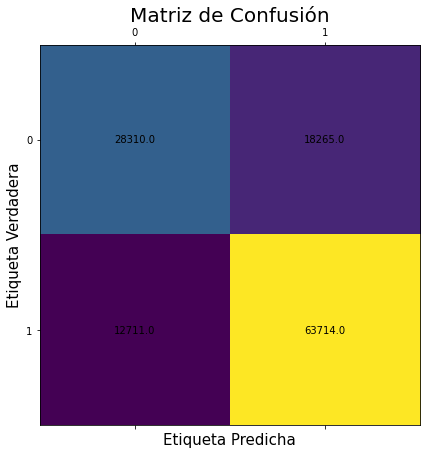

In [41]:
#GRAFICAMOS LA MATRIZ DE CONFUSION
fig, ax = plt.subplots(figsize=(7,7))

ax.matshow(matriz)
for (i, j), z in np.ndenumerate(matriz):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
    plt.title('Matriz de Confusión', fontsize=20)
    plt.ylabel('Etiqueta Verdadera', fontsize=15)
    plt.xlabel('Etiqueta Predicha', fontsize=15)
plt.show()

    FASE 8 Evaluación del modelo

EVALUACION ACCURACY

In [42]:
#IMPORTAMOS LA METRICA ACCURACY Y LA IMPRIMIMOS
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7481626016260162


EVALUACION RECALL

In [43]:
#IMPORTAMOS LA METRICA RECALL Y LA IMPRIMIMOS
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average=None)

array([0.60783682, 0.83368008])

    FASE 9 Prediccioón con el dataset de test

In [44]:
#REALIZAMOS LA PREDICCION CORRESPONDIENTE CON EL DATASET DE TEST
X1 = df_test
pred =  clf.predict(X1)
pred

array([0, 1, 1, ..., 0, 1, 0])

    FASE 10 Exportamos nuestra columna de prediccion en un CSV

In [45]:
#GUARDAMOS LA VARIABLE EN LA QUE PREDECIMOS Y EXPORTAMOS A CSV
file = pd.DataFrame(pred, columns = ['pred'])
file.to_csv('Lina-Arroyo', index=False)